In [1]:
import cv2 
import cv2
import matplotlib.pyplot as plt
import numpy as np 
from collections import deque

## **Kenar Algılama**

140.0
93
186


(-0.5, 1199.5, 1199.5, -0.5)

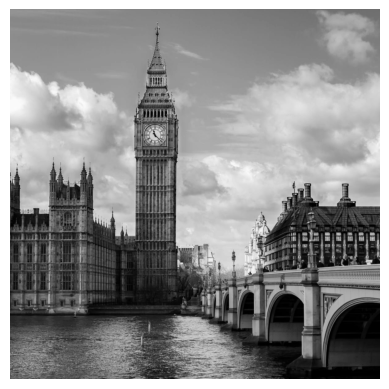

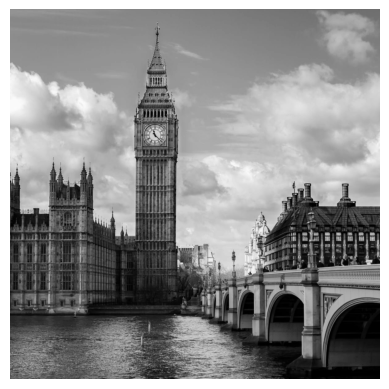

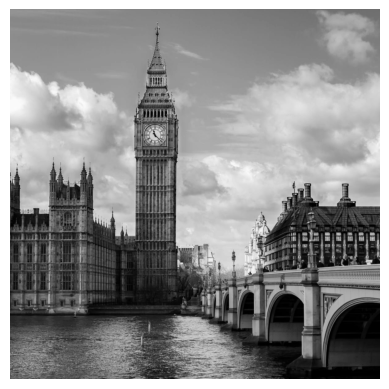

In [2]:
img = cv2.imread("/Users/furkandurmus/Desktop/Computer Vision/Images/london.jpg", 0)
plt.figure() 
plt.imshow(img, cmap="gray") 
plt.axis("off")

edges = cv2.Canny(image=img, threshold1=0, threshold2=255)
plt.figure() 
plt.imshow(img, cmap="gray") 
plt.axis("off")

med_val = np.median(img)
print(med_val)

low = int(max(0, (1 - 0.33)*med_val))
high = int(min(255, ( 1+ 0.33)*med_val))

print(low)
print(high)

edges = cv2.Canny(image=img, threshold1=low, threshold2=high)
plt.figure()
plt.imshow(img, cmap="gray")
plt.axis("off")

### **Blur Methodu İle Yapma**

139.0
93
184


(-0.5, 1199.5, 1199.5, -0.5)

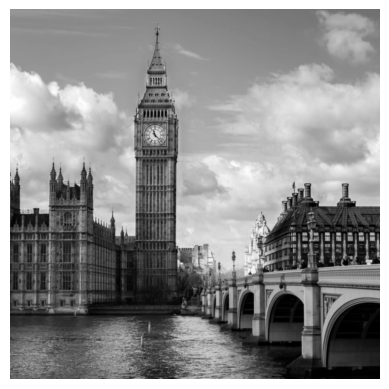

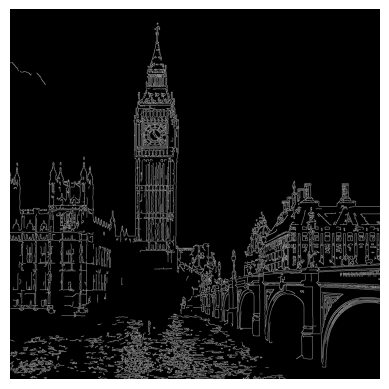

In [3]:
blurred_img = cv2.blur(img, ksize=(3,3))
plt.figure() 
plt.imshow(blurred_img, cmap = "gray") 
plt.axis("off")


med_val = np.median(blurred_img)
print(med_val)

low = int(max(0, (1 - 0.33)*med_val))
high = int(min(255, (1 + 0.33)*med_val))

print(low)
print(high)

edges = cv2.Canny(image = blurred_img, threshold1 = low, threshold2 = high)
plt.figure() 
plt.imshow(edges, cmap = "gray") 
plt.axis("off")


## **Köşe Algılama**

## **Kontur Algılama**

## **Renk İle Nesne Tespiti**

In [4]:
buffer_size = 16 
pts = deque(maxlen=buffer_size)

# Mavi Renk Aralığı 
blueLower = (84, 98, 0)
blueUpper = (179, 255, 255)

#capture 
cap = cv2.VideoCapture(0)
cap.set(3, 960)
cap.set(4, 480)

while True: 

    success, imgOriginal = cap.read()

    if success: 

        blurred = cv2.GaussianBlur(imgOriginal, (11,11), 0)

        hsv = cv2.cvtColor(blurred, cv2.Color_BGR2HSV)
        cv2.imshow("Image HSV", hsv)

        #mavi renk için maske oluşturma 

        mask = cv2.inRange(hsv, blueLower, blueUpper)
        cv2.imshow("Mask Image", mask)

        #maske etrafında bulunan gürültülerin silinmesi 

        mask = cv2.erode(mask, None, iterations= 2)
        mask = cv2.dilate(mask, None, iterations= 2)
        cv2.imshow("Mask And Delete Noise Image", mask)

        #Kontur Ekleme 
        (_, contours, _ ) = cv2.findContours(mask.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
        center = None 

        if len(contours) > 0: 
            # en büyük kontur al 
            c = max(contours, key = cv2.contourArea)

            #konturleri dikdörtgene çevir
            rect = cv2.minAreaRect(c)
            ((x,y), (width, height), rotation) = rect
            s = "x: {}, y: {}, widht: {}, height: {}, rotation: {}".format(np.round(x),np.round(y),np.round(width),np.round(height),np.round(rotation))
            print(s)

            box = cv2.boxPoints(rect)
            box = cv2.int64(box)

            #moment
            M = cv2.moments(c)
            center = (int(M["m10"] / M["m00"]), int(M["m01"] / M["m00"]))

            # kontur çizdirme 
            cv2.drawContours(imgOriginal, [box], 0, (0,255,255), 2)

            #merkeze nokta çizdirme 
            cv2.circle(imgOriginal, center, 5, (255,0,255), -1)

            #bilgileri ekrana yazdırma
            cv2.putText(imgOriginal, s, (50,50), cv2.FONT_HERSHEY_COMPLEX_SMALL, 1, (0,0,0), 2)
        cv2.imshow(imgOriginal)

    if cv2.waitKey(1) & 0xFF == ord("q"): break

AttributeError: module 'cv2' has no attribute 'Color_BGR2HSV'

# **Şablon Eşleşme**

(433, 650)
(219, 253)
(215, 398)
(215, 398)
(215, 398)
(215, 398)
(215, 398)
(215, 398)


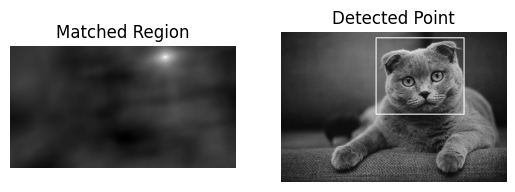

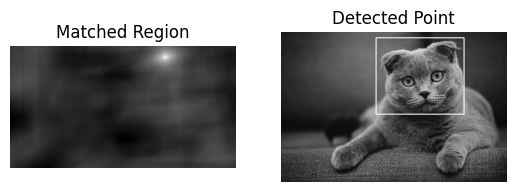

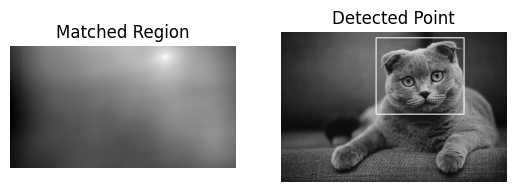

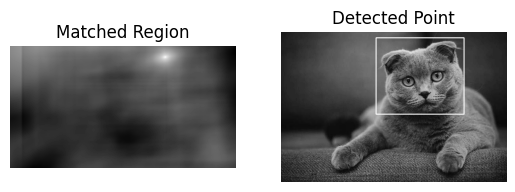

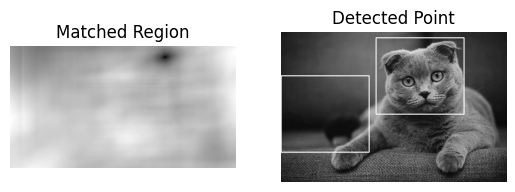

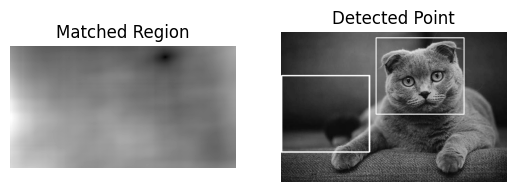

In [ ]:
# Template Matching 

img = cv2.imread("/Users/furkandurmus/Desktop/Computer Vision/Images/cat.jpg", 0)
print(img.shape)

template = cv2.imread("/Users/furkandurmus/Desktop/Computer Vision/Images/cat_face.jpg", 0)
print(template.shape)
h, w = template.shape

methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
            'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

for meth in methods: 

    method = eval(meth)
    res = cv2.matchTemplate(img, template, method)
    print(res.shape)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)

    if methods in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]: 
        top_left = min_loc
    else: 
        top_left = max_loc

    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img, top_left, bottom_right, 255, 2)

    plt.figure()
    plt.subplot(121)
    plt.imshow(res, cmap="gray")
    plt.title('Matched Region')
    plt.axis("off")

    plt.subplot(122)
    plt.imshow(img, cmap="gray")
    plt.title('Detected Point')
    plt.axis("off")

# **Özellik Eşleştirme** 

In [ ]:
chos = cv2.imread("/Users/furkandurmus/Desktop/Computer Vision/Images/chocolates.jpg", 0)
plt.figure()
plt.imshow(chos, cmap = "gray")
plt.axis("off")

cho = cv2.imread("/Users/furkandurmus/Desktop/Computer Vision/Images/nestle.jpg", 0)
plt.figure()
plt.imshow(cho, cmap = "gray")
plt.axis("off")

#Orb Tanımlayıcısı 
#köşe-kenar gibi nesneye ait özellikler 
orb = cv2.ORB_create()

#Anahtar Nokta Tespiti 
kp1, des1 = orb.detectAndCompute(cho, None)
kp2, des2 = orb.detectAndCompute(chos, None)

#bf Matcher 
bf = cv2.BFMatcher(cv2.NORM_HAMMING)
matches = bf.match(des1, des2)

#Tüm eşleşmeleri sırala ve en iyi 20'sini al
matches = sorted(matches, key= lambda x:x.distance)

plt.figure()
img_match = cv2.drawMatches(cho, kp1, chos, kp2, matches[:20], None, flags = 2)
plt.imshow(img_match)
plt.axis("off")
plt.title("Orb")

#Sift Tanımlayıcısı 
sift = cv2.xfeatures2d.SIFT_create()

bf = cv2.BFMatcher()

kp1, des1 = sift.detectAndCompute(cho, None)
kp2, des2 = sift.detectAndCompute(chos, None)

matches = bf.knnMatch(des1, des2, k = 2)

good = []

for match1, match2 in matches: 
    if match1.distance < 0.5*match2.distance: 
        good.append([match1])

plt.figure()
img_match = cv2.drawMatchesKnn(cho, kp1, chos, kp2, good, None, flags=2)
plt.imshow(img_match), plt.axis('off'), plt.title("Sift")

# **Havza Algoritması**

(<Figure size 640x480 with 1 Axes>,
 (-0.5, 1023.5, 767.5, -0.5))

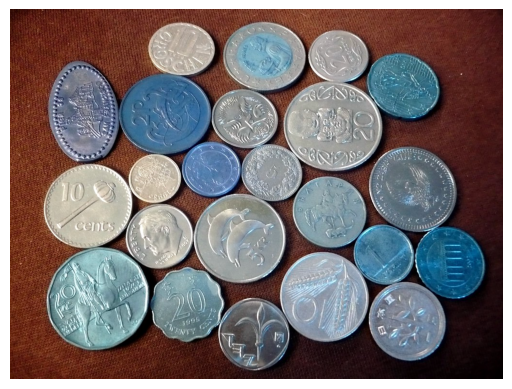

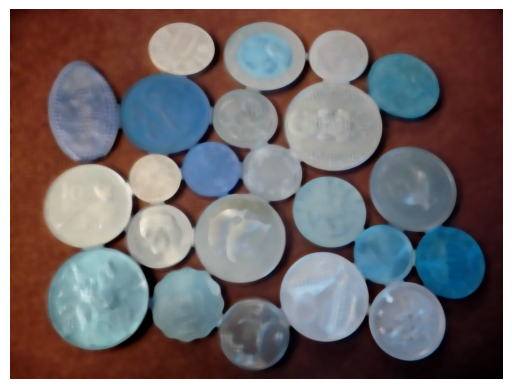

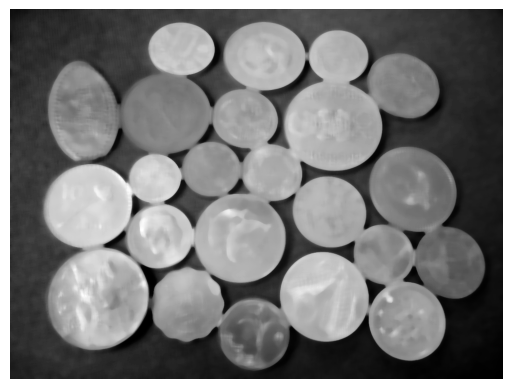

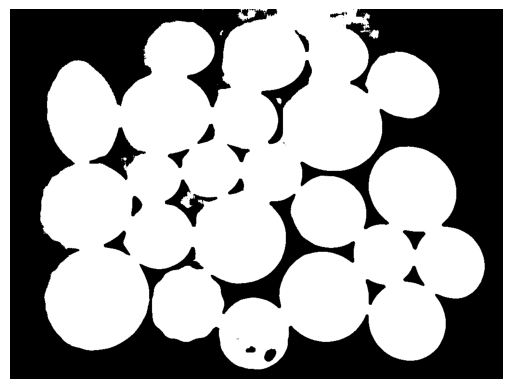

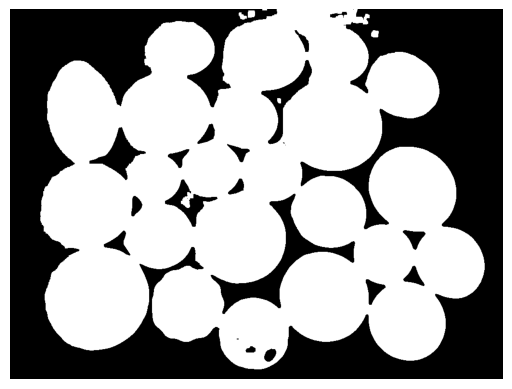

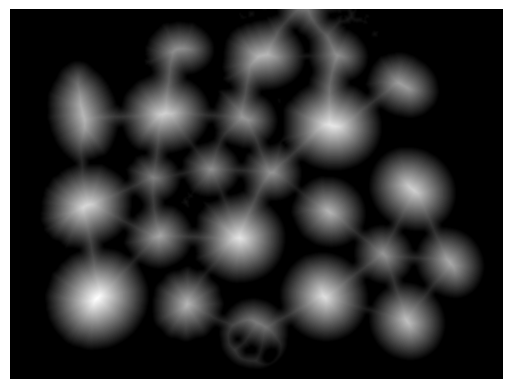

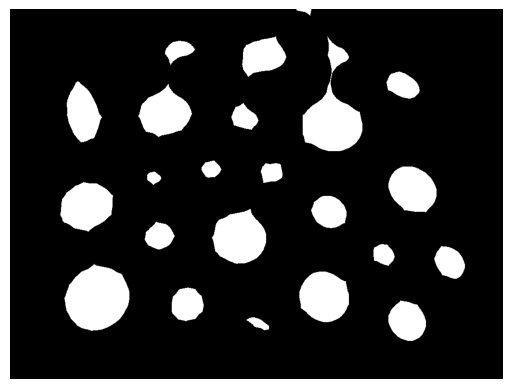

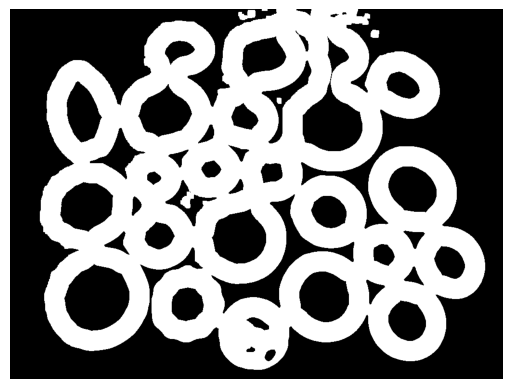

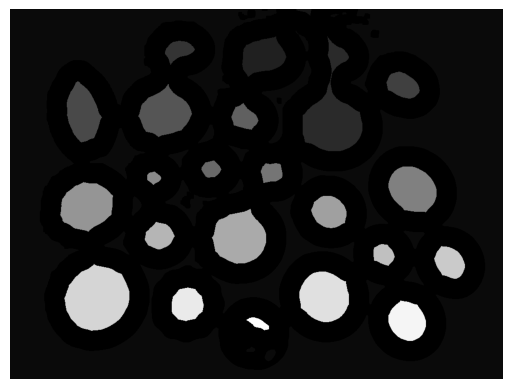

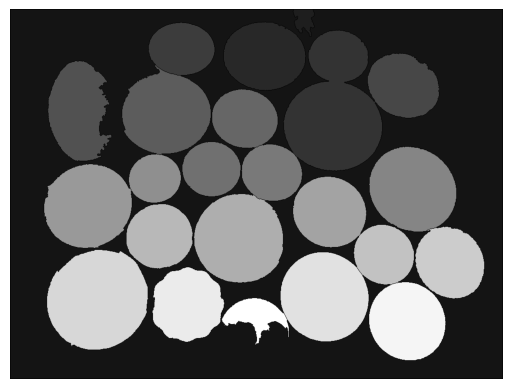

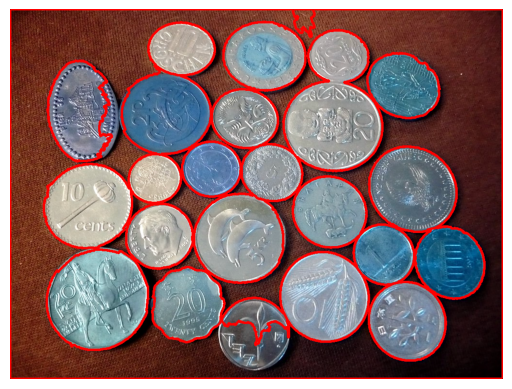

In [17]:
coin = cv2.imread("/Users/furkandurmus/Desktop/Computer Vision/Images/coins.jpg")
plt.figure(), plt.imshow(coin), plt.axis("off")

# lpf: blurring process
coin_blur = cv2.medianBlur(coin, 13)
plt.figure(), plt.imshow(coin_blur), plt.axis("off")

# gray scaller process
coin_gray = cv2.cvtColor(coin_blur, cv2.COLOR_BGR2GRAY)
plt.figure(), plt.imshow(coin_gray, cmap="gray"), plt.axis("off")

#binary threshold 
ret, coin_thresh = cv2.threshold(coin_gray, 65, 255, cv2.THRESH_BINARY)
plt.figure(), plt.imshow(coin_thresh, cmap='gray'), plt.axis('off')

# açılma işlemi 
kernel = np.ones((3,3), np.uint8)
opening = cv2.morphologyEx(coin_thresh, cv2.MORPH_OPEN, kernel, iterations=2)
plt.figure(), plt.imshow(opening, cmap='gray'), plt.axis('off')

# nesneler arası distance bulma 
dist_transform = cv2.distanceTransform(opening, cv2.DIST_L2, 5)
plt.figure(), plt.imshow(dist_transform, cmap="gray"), plt.axis("off")

# resmi küçültme 
ret, sure_foreground = cv2.threshold(dist_transform, 0.4*np.max(dist_transform), 255, 0)
plt.figure(), plt.imshow(sure_foreground, cmap="gray"), plt.axis("off")

# arka plan için resmi büyültme 
sure_background = cv2.dilate(opening, kernel, iterations=1)
sure_foreground = np.uint8(sure_foreground)
unknown = cv2.subtract(sure_background, sure_foreground)
plt.figure(), plt.imshow(unknown, cmap="gray"), plt.axis("off")

# baglantı 
ret, marker = cv2.connectedComponents(sure_foreground)
marker = marker + 1
marker[unknown == 255] = 0
plt.figure(), plt.imshow(marker, cmap = "gray"), plt.axis("off")

# havza algoritması (watershed)
marker = cv2.watershed(coin, marker)
plt.figure(), plt.imshow(marker, cmap="gray"), plt.axis("off")

# kontur
contours, hierarchy = cv2.findContours(marker.copy(), cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

for i in range(len(contours)):
    
    if hierarchy[0][i][3] == -1:
        cv2.drawContours(coin, contours,i,(255,0,0),2)
plt.figure(),plt.imshow(coin),plt.axis("off")

